# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('F:/work/Python/project/Learn/data/ml-latest/hwML/hw2/data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('F:/work/Python/project/Learn/data/ml-latest/hwML/hw2/data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('F:/work/Python/project/Learn/data/ml-latest/hwML/hw2/data/otp_test.csv', sep='\t')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Неоконченное высшее', 'Среднее специальное', 'Два и более высших образования', 'Среднее', 'Неполное среднее', 'Высшее'}


MARITAL_STATUS
{'Разведен(а)', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Энергетика', 'Металлургия/Промышленность/Машиностроение', 'Ресторанный бизнес/Общественное питание', 'Страхование', 'Подбор персонала', 'Информационные технологии', 'Нефтегазовая промышленность', 'ЧОП/Детективная д-ть', 'Развлечения/Искусство', 'Банк/Финансы', 'Управляющая компания', 'Наука', 'Сборочные производства', 'Образование', 'Туризм', 'Другие сферы', 'СМИ/Реклама/PR-агенства', 'Химия/Парфюмерия/Фармацевтика', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Транспорт', 'Салоны красоты и здоровья', 'Логистика', 'Государственная служба', 'Коммунальное хоз-во/Дорожные службы', 'Недвижимость', 'Маркетинг', 'Сельское хозяйство', 'Строительство', 'Здравоохранение', 'Торговля'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
list = ['PERSONAL_INCOME','CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']

for i in list:
    df[i] = df[i].map(lambda x: x.replace(',', '.')).astype('float')



Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски в 

GEN_INDUSTRY  
GEN_TITLE   
ORG_TP_STATE  
ORG_TP_FCAPITAL
JOB_DIR
WORK_TIME

Отсутствие месте работы. Это категрия - беработные
В строковых стодбацах пропуски можно заменить например на 'Безработный'

В столбце WORK_TIME, время работы на текущем месте можно заменить на 0.
PREVIOUS_CARD_NUM_UTILIZED по  условиям задачи тоже 0.
TP_PROVINCE - пропуски там, где клиент еще не брал кредит, можно заменить тоже на 0. После перекодировки разницы не будет.


In [15]:
# Количество пропусков и безработных почти совпадают, разницей можно принебречь.
print(df['SOCSTATUS_WORK_FL'].sum())
print(df['GEN_INDUSTRY'].count())


27395
27420


In [16]:

list_of_columns = ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR']
def nan_cells(df, list_of_columns):
    for column in list_of_columns:
        df[column] = df[column].fillna('Безработный')
    return df
        

for i in df['SOCSTATUS_WORK_FL']:
    if i == 0:
        df = nan_cells(df,list_of_columns)


list = ['WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED']  

for i in list:
    df[i] = df[i].fillna(0)
    
df['TP_PROVINCE'] = df['TP_PROVINCE'].fillna('Не брал кредит')    


dfClean = df
dfClean = dfClean.drop('AGREEMENT_RK', 1)
dfClean = dfClean[~df['REGION_NM'].isnull()]

In [17]:
dfClean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30131 entries, 0 to 30132
Data columns (total 52 columns):
TARGET                        30131 non-null int64
AGE                           30131 non-null int64
SOCSTATUS_WORK_FL             30131 non-null int64
SOCSTATUS_PENS_FL             30131 non-null int64
GENDER                        30131 non-null int64
CHILD_TOTAL                   30131 non-null int64
DEPENDANTS                    30131 non-null int64
EDUCATION                     30131 non-null object
MARITAL_STATUS                30131 non-null object
GEN_INDUSTRY                  30131 non-null object
GEN_TITLE                     30131 non-null object
ORG_TP_STATE                  30131 non-null object
ORG_TP_FCAPITAL               30131 non-null object
JOB_DIR                       30131 non-null object
FAMILY_INCOME                 30131 non-null object
PERSONAL_INCOME               30131 non-null float64
REG_ADDRESS_PROVINCE          30131 non-null object
FACT_ADDRESS_

In [18]:
pd.set_option('display.max_columns', 52)
dfClean

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000.0,Красноярский край,Красноярский край,Красноярский край,Красноярский край,ВОСТОЧНО-СИБИРСКИЙ,0,1,0,0,1,1,0,0,0,0,0,0,3016.80,5,335.20,0,0,96,39.0,1,0,1,2,2,8,0,0,0.000000,0.00,0.0,test
1,0,48,0,1,1,0,0,Среднее,Состою в браке,Безработный,Безработный,Безработный,Безработный,Безработный,от 10000 до 20000 руб.,4100.0,Орловская область,Орловская область,Орловская область,Орловская область,ЦЕНТРАЛЬНЫЙ 1,1,1,1,1,1,0,0,0,1,0,1,0,6000.00,6,2000.00,0,1,299,0.0,0,0,0,2,1,15,0,0,0.000000,0.00,0.0,test
2,0,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,40000.0,Коми,Коми,Коми,Коми,ЦЕНТРАЛЬНЫЙ 2,1,1,1,1,1,0,1,1,0,0,0,0,10000.00,6,2490.00,0,0,19,156.0,1,0,1,1,1,1,0,0,0.000000,0.00,0.0,test
3,0,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,20000.0,Читинская область,Читинская область,Читинская область,Читинская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,1,0,0,0,0,0,0,5175.00,4,575.00,0,0,252,9.0,1,0,1,3,2,9,0,0,0.000000,0.00,0.0,test
4,0,27,1,0,1,2,2,Высшее,Состою в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,от 20000 до 50000 руб.,17000.0,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,1,1,1,1,1,0,0,0,0,0,0,0,13065.00,6,10000.00,0,0,36,84.0,0,0,1,1,1,5,0,0,0.000000,0.00,0.0,test
5,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,Безработный,Безработный,Безработный,Безработный,Безработный,от 10000 до 20000 руб.,7000.0,Кировская область,Кировская область,Кировская область,Кировская область,ПРИВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,13824.20,5,10239.00,0,1,84,0.0,0,0,0,1,1,5,0,0,0.000000,0.00,0.0,test
6,0,57,1,0,1,0,0,Среднее,Не состоял в браке,Сборочные производства,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,10000.0,Курганская область,Курганская область,Курганская область,Курганская область,УРАЛЬСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8900.00,3,1000.00,0,1,300,444.0,0,0,1,3,3,14,0,0,0.000000,0.00,0.0,test
7,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7500.0,Томская область,Томская область,Томская область,Томская область,ЗАПАДНО-СИБИРСКИЙ,1,1,1,1,1,1,0,0,0,0,0,0,8590.00,12,5000.00,0,0,24,144.0,1,0,1,1,1,5,0,0,0.000000,0.00,0.0,test
8,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,Безработный,Безработный,Безработный,Безработный,Безработный,от 10000 до 20000 руб.,9000.0,Омская область,Омская область,Омская область,Омская область,ЗАПАДНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,12521.00,5,659.00,0,0,276,0.0,1,0,0,1,1,4,0,0,0.000000,0.00,0.0,test
9,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Вспомогательный техперсонал,от 5000 до 10000 руб.,4000.0,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛ

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальные признаки закодируем с помощью функции LabelEncoder

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [19]:
from sklearn.preprocessing import LabelEncoder

list = ['GEN_INDUSTRY','EDUCATION','MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME',
       'REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE', 'REGION_NM']

for i in list:
    label = LabelEncoder()
    dfClean[i]=label.fit_transform(dfClean[i])
        

dfClean.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 30131 entries, 0 to 30132
Data columns (total 52 columns):
TARGET                        30131 non-null int64
AGE                           30131 non-null int64
SOCSTATUS_WORK_FL             30131 non-null int64
SOCSTATUS_PENS_FL             30131 non-null int64
GENDER                        30131 non-null int64
CHILD_TOTAL                   30131 non-null int64
DEPENDANTS                    30131 non-null int64
EDUCATION                     30131 non-null int64
MARITAL_STATUS                30131 non-null int64
GEN_INDUSTRY                  30131 non-null int64
GEN_TITLE                     30131 non-null int64
ORG_TP_STATE                  30131 non-null int64
ORG_TP_FCAPITAL               30131 non-null int64
JOB_DIR                       30131 non-null int64
FAMILY_INCOME                 30131 non-null int64
PERSONAL_INCOME               30131 non-null float64
REG_ADDRESS_PROVINCE          30131 non-null int64
FACT_ADDRESS_PROVINCE 

In [20]:
#df_preproc = df.pipe(preproc_data)
preproc_data = dfClean

df_train_preproc = preproc_data.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = preproc_data.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

y = df_train_preproc['TARGET']
df_train_preproc = df_train_preproc.drop('TARGET', axis=1)

F:\work\Python\envs\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Задание 5. Обучение и оценка качества разных моделей

In [22]:

X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)

modelLR = LogisticRegression()                    
modelLR.fit(X_train, y_train)  
predictLR = modelLR.predict(X_test)                    


print('precision', precision_score(y_test, predictLR))
print('recall', recall_score(y_test, predictLR))
print('accuracy', accuracy_score(y_test, predictLR))
print('f1', f1_score(y_test, predictLR))
print('='*10)
print(classification_report(y_test, predictLR))


precision 0.3333333333333333
recall 0.001579778830963665
accuracy 0.8738057324840764
f1 0.003144654088050314
             precision    recall  f1-score   support

          0       0.87      1.00      0.93      4391
          1       0.33      0.00      0.00       633

avg / total       0.81      0.87      0.82      5024



In [23]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)
predictRF = modelRF.predict(X_test)

print('precision', precision_score(y_test, predictRF))
print('recall', recall_score(y_test, predictRF))
print('accuracy', accuracy_score(y_test, predictRF))
print('f1', f1_score(y_test, predictRF))
print('='*10)
print(classification_report(y_test, predictRF))


precision 0.14285714285714285
recall 0.00315955766192733
accuracy 0.8720143312101911
f1 0.0061823802163833074
             precision    recall  f1-score   support

          0       0.87      1.00      0.93      4391
          1       0.14      0.00      0.01       633

avg / total       0.78      0.87      0.82      5024



In [24]:
modelRF1000 = RandomForestClassifier(n_estimators=1000)
modelRF1000.fit(X_train, y_train)
predictRF1000 = modelRF1000.predict(X_test)

print('precision', precision_score(y_test, predictRF1000))
print('recall', recall_score(y_test, predictRF1000))
print('accuracy', accuracy_score(y_test, predictRF1000))
print('f1', f1_score(y_test, predictRF1000))
print('='*10)
print(classification_report(y_test, predictRF1000))

precision 0.0
recall 0.0
accuracy 0.8740047770700637
f1 0.0
             precision    recall  f1-score   support

          0       0.87      1.00      0.93      4391
          1       0.00      0.00      0.00       633

avg / total       0.76      0.87      0.82      5024



F:\work\Python\envs\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\work\Python\envs\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\work\Python\envs\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression 0.6507494325424366
RandomForest 0.5967208885905142
RandomForest1000 0.683017791310173


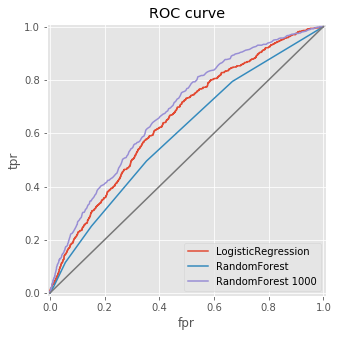

In [25]:
predict_probaLR = modelLR.predict_proba(X_test)
predict_probaRF = modelRF.predict_proba(X_test)
predict_probaRF1000 = modelRF1000.predict_proba(X_test)


%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fprLR, tprLR, thresholds = roc_curve(y_test, predict_probaLR[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, predict_probaRF[:,1])
fprRF1000, tprRF1000, thresholds = roc_curve(y_test, predict_probaRF1000[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fprLR, tprLR, label= 'LogisticRegression')
plt.plot(fprRF, tprRF, label= 'RandomForest')
plt.plot(fprRF1000, tprRF1000, label= 'RandomForest 1000')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.legend(loc=4, fontsize='10')
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('LogisticRegression', roc_auc_score(y_test, predict_probaLR[:,1]))
print('RandomForest', roc_auc_score(y_test, predict_probaRF[:,1]))
print('RandomForest1000', roc_auc_score(y_test, predict_probaRF1000[:,1]))

In [26]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression() 
aucLR = cross_val_score(
    lr,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
)

print(aucLR)
print('Mean', aucLR.mean())

[0.65882849 0.63664151 0.67744035 0.65380828 0.65906535 0.60386205
 0.63775281 0.65407196 0.64191809 0.673444  ]
Mean 0.6496832885186178


In [27]:
rmc = RandomForestClassifier()
aucRmc = cross_val_score(
    rmc,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
)

print(aucRmc)
print('Mean', aucRmc.mean())

[0.58342347 0.58828699 0.62113703 0.59483316 0.58987685 0.59360336
 0.58515332 0.60227792 0.62365432 0.59797257]
Mean 0.5980219001502698


In [28]:
rmc1000 = RandomForestClassifier(n_estimators=1000)
aucRmc1000 = cross_val_score(
    rmc1000,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
)

print(aucRmc1000)
print('Mean', aucRmc1000.mean())

[0.65705436 0.62979489 0.69805868 0.64041018 0.67399401 0.66107795
 0.65655835 0.6866567  0.70634803 0.69970048]
Mean 0.6709653615323088


In [29]:
y = df_test_preproc['TARGET']
df_test_preproc = df_test_preproc.drop('TARGET', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_test_preproc, y, test_size=0.33, random_state=42)

RandomForest1000 0.6945304447891129


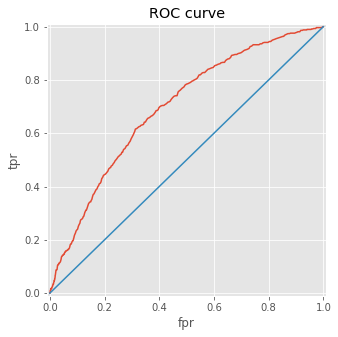

In [30]:
modelRF1000 = RandomForestClassifier(n_estimators=1000)
modelRF1000.fit(X_train, y_train)
predictRF1000 = modelRF1000.predict(X_test)


predict_proba = modelRF1000.predict_proba(X_test)

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('RandomForest1000', roc_auc_score(y_test, predict_proba[:,1]))
